In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('house_dataset.csv')
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


<h2> Data Preprocessing

In [3]:
# converting the column name from upper case to lower case
cols = []
for i in df.columns:
    i = i.lower()
    cols.append(i)
df.columns = cols
df.head(2)

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,target(price_in_lacs)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0


In [4]:
cols

['posted_by',
 'under_construction',
 'rera',
 'bhk_no.',
 'bhk_or_rk',
 'square_ft',
 'ready_to_move',
 'resale',
 'address',
 'longitude',
 'latitude',
 'target(price_in_lacs)']

<h3>Check the missing value

In [5]:
# Check for missing values
df.columns[df.isnull().any()]

df.isnull().sum()
# no missing values

posted_by                0
under_construction       0
rera                     0
bhk_no.                  0
bhk_or_rk                0
square_ft                0
ready_to_move            0
resale                   0
address                  0
longitude                0
latitude                 0
target(price_in_lacs)    0
dtype: int64

In [6]:
# First we should extract the city as its own field
df['city'] = df['address'].str.split(',',expand=True).iloc[:,1]
df['area'] = df['address'].str.split(',',expand=True).iloc[:,0]
df.head(2)

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,target(price_in_lacs),city,area
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Ksfc Layout
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar


In [7]:
df = df.rename(columns={"target(price_in_lacs)": "price_in_lacs"})
df.head(2)

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,price_in_lacs,city,area
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Ksfc Layout
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar


In [8]:
df.square_ft.describe()

count    2.945100e+04
mean     1.980217e+04
std      1.901335e+06
min      3.000000e+00
25%      9.000211e+02
50%      1.175057e+03
75%      1.550688e+03
max      2.545455e+08
Name: square_ft, dtype: float64

In [9]:
df.longitude.describe()

count    29451.000000
mean        21.300255
std          6.205306
min        -37.713008
25%         18.452663
50%         20.750000
75%         26.900926
max         59.912884
Name: longitude, dtype: float64

In [10]:
df.latitude.describe()

count    29451.000000
mean        76.837695
std         10.557747
min       -121.761248
25%         73.798100
50%         77.324137
75%         77.828740
max        152.962676
Name: latitude, dtype: float64

In [11]:
df['posted_by'].unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

In [12]:
df['bhk_or_rk'].unique()

array(['BHK', 'RK'], dtype=object)

In [13]:
df.shape

(29451, 14)

In [14]:
# removing an outlier. keeping only the rows where the "square_ft" values fall within the 1st and 99th percentiles of the column's distribution.
q_low = df["square_ft"].quantile(0.01)
q_hi  = df["square_ft"].quantile(0.99)

df = df[(df["square_ft"] < q_hi) & (df["square_ft"] > q_low)]
df.head(2)

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,price_in_lacs,city,area
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Ksfc Layout
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar


In [15]:
inr_usd_rate = 80

In [16]:
df["price_in_usd"] = (df["price_in_lacs"]*100000)/inr_usd_rate
df.head(2)

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,price_in_lacs,city,area,price_in_usd
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Ksfc Layout,68750.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar,63750.0


In [17]:
df.price_in_usd.describe()

count    2.885900e+04
mean     1.240913e+05
std      1.896763e+05
min      3.125000e+02
25%      4.750000e+04
50%      7.750000e+04
75%      1.250000e+05
max      6.875000e+06
Name: price_in_usd, dtype: float64

<h2> Data Visualization

In [18]:
df_viz = df # creating new data frame df_viz and assigning it same value as df
df_viz.head(2)

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,price_in_lacs,city,area,price_in_usd
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Ksfc Layout,68750.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar,63750.0


In [19]:
df_viz["resale"] = df_viz["resale"].replace(to_replace = 0, value = "Not for Resale")
df_viz["resale"] = df_viz["resale"].replace(to_replace = 1, value = "For Resale")
df_viz["ready_to_move"] = df_viz["ready_to_move"].replace(to_replace = 1, value = "Move-In Ready")
df_viz["ready_to_move"] = df_viz["ready_to_move"].replace(to_replace = 0, value = "Unfinished")

df_viz.head(2)

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,price_in_lacs,city,area,price_in_usd
0,Owner,0,0,2,BHK,1300.236407,Move-In Ready,For Resale,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Ksfc Layout,68750.0
1,Dealer,0,0,2,BHK,1275.000000,Move-In Ready,For Resale,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar,63750.0


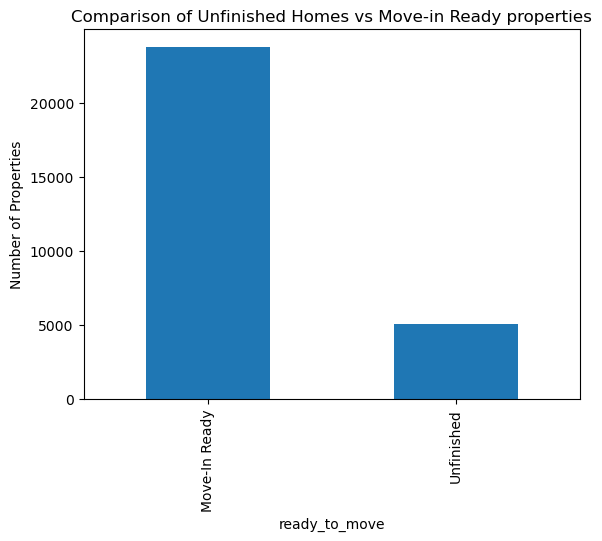

In [20]:
# Comparison of the proportion of homes ready for move-in in relation to total homes


ready_df = df_viz.groupby("ready_to_move")["posted_by"].count()

ready_df.plot(kind = "bar")

plt.title("Comparison of Unfinished Homes vs Move-in Ready properties")
plt.ylabel("Number of Properties")
plt.show()

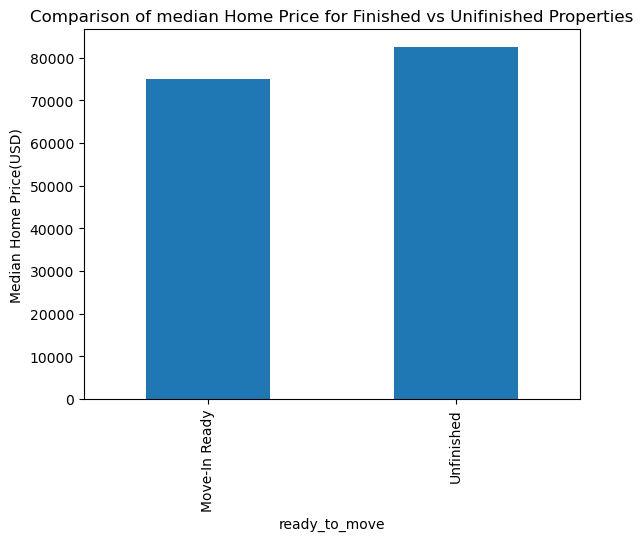

In [21]:
# Comparison of median price of finished vs unfinished homes

df_viz.groupby("ready_to_move")["price_in_usd"].median().plot(kind = "bar")

plt.title("Comparison of median Home Price for Finished vs Unifinished Properties")
plt.ylabel("Median Home Price(USD)")
plt.show()

#Surprisingly, unfinished homes tend to be valued more than move-in ready properties

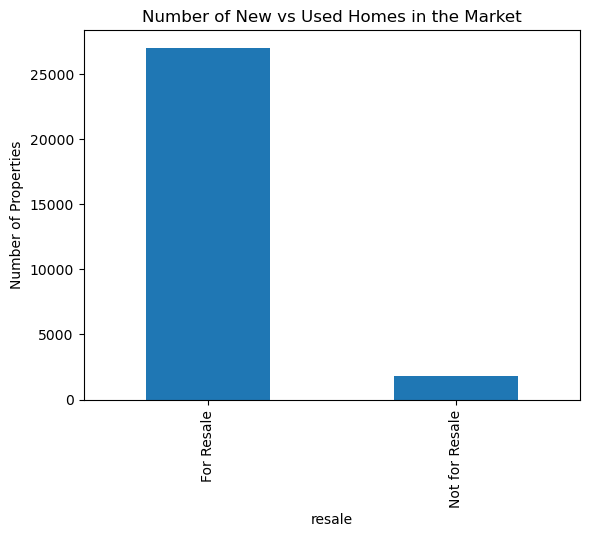

In [22]:
df_viz.groupby("resale")["posted_by"].count().plot(kind = "bar")

plt.title("Number of New vs Used Homes in the Market")
plt.ylabel("Number of Properties")
plt.show()

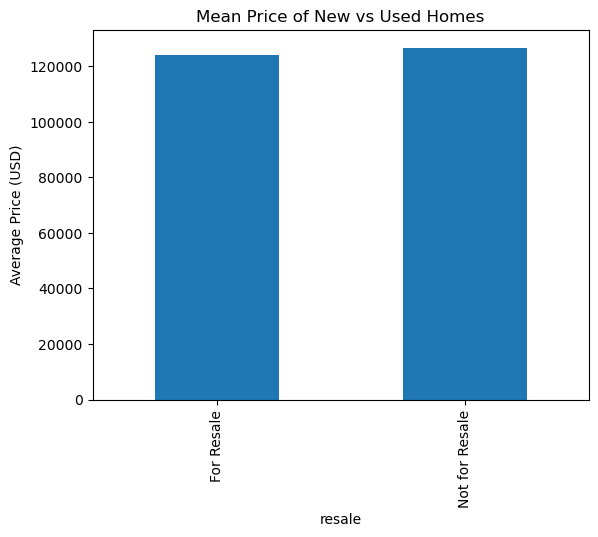

In [23]:
#Comparison of Average price in New vs Used Homes
df_viz.groupby("resale")["price_in_usd"].mean().plot(kind = "bar")

plt.title("Mean Price of New vs Used Homes")
plt.ylabel("Average Price (USD)")
plt.show()

# As expected, the price of newly built homes far exceeds the average price of homes for resale

In [24]:
# Now lets make a table of number of homes under construction by city
tmp = df_viz.groupby(['city']).count()
tmp = tmp.iloc[:, 1].to_frame()
#tmp.head(2)

In [25]:
# Next lets get the top 5 values
tmp = tmp.sort_values('under_construction', ascending=False)
top5_tmp = tmp.iloc[0:5,:].sort_values('under_construction')

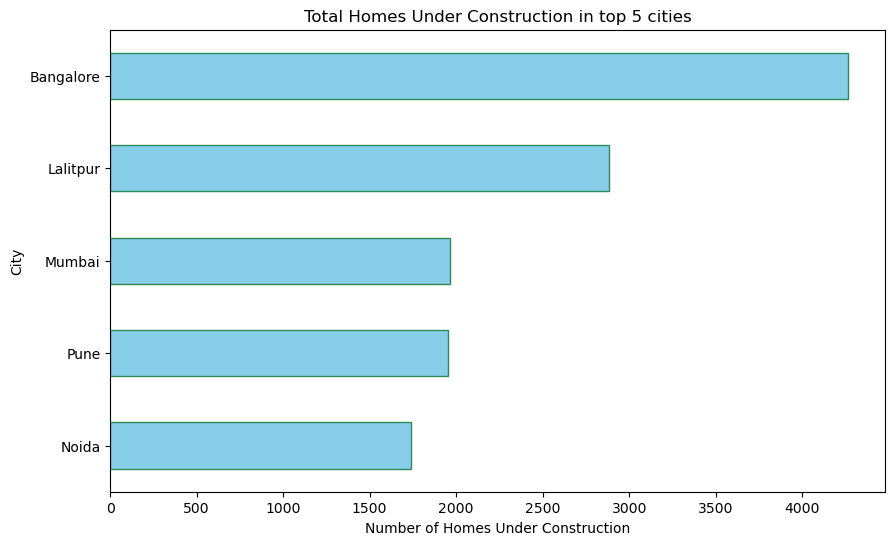

In [26]:
# Create a bar chart showing the top 5 cities with homes under construction
top5_tmp.plot(kind='barh', 
              color= 'skyblue', 
              edgecolor='seagreen', 
              legend=None, 
              figsize=(10, 6))

#Set descriptions:
plt.title("Total Homes Under Construction in top 5 cities")
plt.xlabel('Number of Homes Under Construction')
plt.ylabel('City')


plt.show()

In [27]:
# Will we find that these cities have on average, the highest priced homes?
cities = df_viz.groupby('city')['price_in_usd'].mean().sort_values(ascending=False)[0:5]

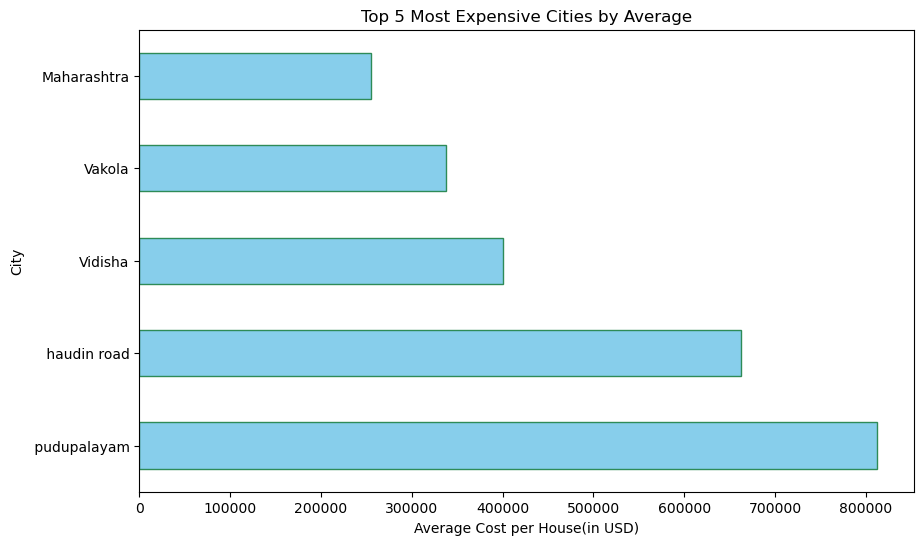

In [28]:
cities.plot(kind='barh', 
              color= 'skyblue', 
              edgecolor='seagreen', 
              legend=None, 
              figsize=(10, 6))

#Set descriptions:
plt.title("Top 5 Most Expensive Cities by Average")
plt.xlabel('Average Cost per House(in USD)')
plt.ylabel('City')


plt.show()

In [29]:
# Lets remove those outliers for a more informational plot
df_viz = df_viz.loc[df_viz['price_in_usd']>1000,] #only consider houses whose price > 1000 and bedrooms less than 10
df_viz = df_viz.loc[df_viz['bhk_no.']<10,]
df_viz.head(2)

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,price_in_lacs,city,area,price_in_usd
0,Owner,0,0,2,BHK,1300.236407,Move-In Ready,For Resale,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Ksfc Layout,68750.0
1,Dealer,0,0,2,BHK,1275.000000,Move-In Ready,For Resale,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar,63750.0


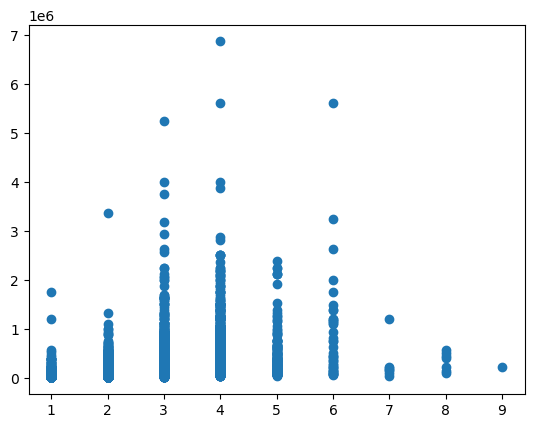

In [30]:
plt.scatter(df_viz['bhk_no.'], df_viz['price_in_usd'])
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

<h3> Intesting! So more bedrooms don't necessarily signify a higher price.

<h2> Data Modeling

<h3> Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
df.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,price_in_lacs,city,area,price_in_usd
0,Owner,0,0,2,BHK,1300.236407,Move-In Ready,For Resale,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Ksfc Layout,68750.0
1,Dealer,0,0,2,BHK,1275.000000,Move-In Ready,For Resale,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar,63750.0
2,Owner,0,0,2,BHK,933.159722,Move-In Ready,For Resale,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,Jigani,53750.0
3,Owner,0,1,2,BHK,929.921143,Move-In Ready,For Resale,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,Sector-1 Vaishali,78125.0
4,Dealer,1,0,2,BHK,999.009247,Unfinished,For Resale,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,New Town,75625.0


<h4> Correlation Heatmap
    

A correlation heatmap is a great way to visually explore relationships between different variables in your dataset. It can help identify patterns, multicollinearity, and potential features for your regression model. The color intensity and the values in the cells indicate the strength and direction of the correlation.

/var/folders/kd/zltqb14n7v38k8p3g8fgjrhc0000gn/T/ipykernel_13983/1291205441.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


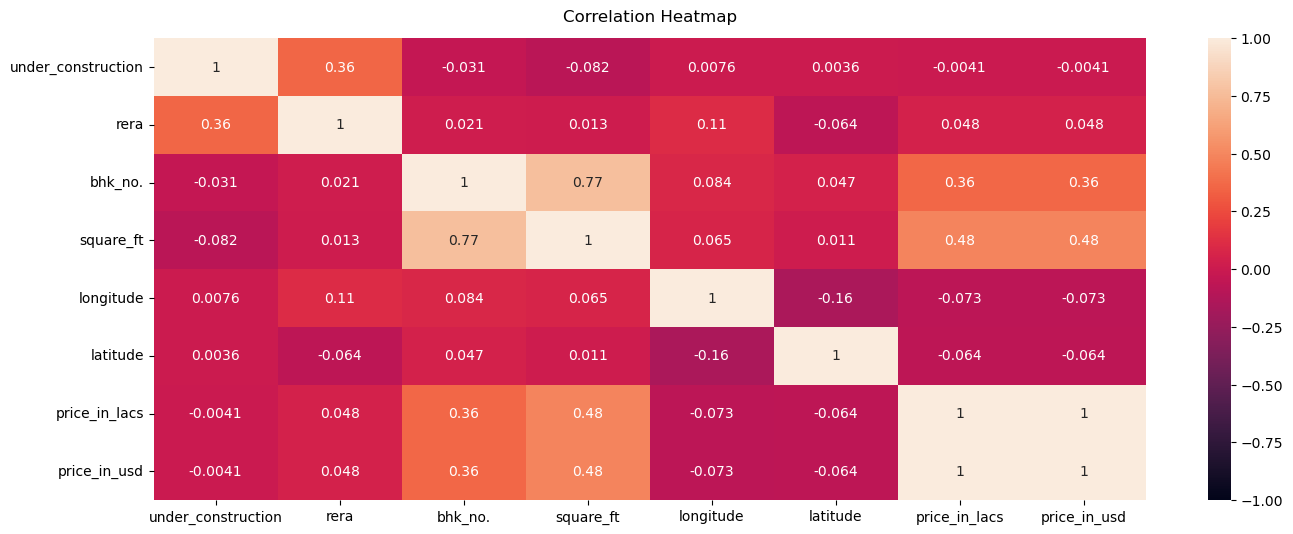

In [33]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

plt.show()

In [34]:
cols= df.columns
#print(cols)
mdf = df[['posted_by', 'under_construction', 'rera', 'bhk_no.',
       'square_ft', 'ready_to_move', 'resale', 'longitude',
       'latitude', 'city', 'area', 'price_in_usd']]

mdf.head()

,posted_by,under_construction,rera,bhk_no.,square_ft,ready_to_move,resale,longitude,latitude,city,area,price_in_usd
0,Owner,0,0,2,1300.236407,Move-In Ready,For Resale,12.969910,77.597960,Bangalore,Ksfc Layout,68750.0
1,Dealer,0,0,2,1275.000000,Move-In Ready,For Resale,12.274538,76.644605,Mysore,Vishweshwara Nagar,63750.0
2,Owner,0,0,2,933.159722,Move-In Ready,For Resale,12.778033,77.632191,Bangalore,Jigani,53750.0
3,Owner,0,1,2,929.921143,Move-In Ready,For Resale,28.642300,77.344500,Ghaziabad,Sector-1 Vaishali,78125.0
4,Dealer,1,0,2,999.009247,Unfinished,For Resale,22.592200,88.484911,Kolkata,New Town,75625.0


get dummies for categorical variable

In [35]:
df.square_ft.min()

375.00633460000006

In [36]:
#only consider bedrooms less than 10
mdf = mdf.loc[mdf['bhk_no.']<10,]

In [37]:
#let's remove some more outliers:

q_low = mdf["price_in_usd"].quantile(0.02)
q_hi  = mdf["price_in_usd"].quantile(0.98)

mdf = mdf[(mdf["price_in_usd"] < q_hi) & (mdf["price_in_usd"] > q_low)]


In [38]:
#let's remove some more outliers:

q_low = mdf["square_ft"].quantile(0.02)
q_hi  = mdf["square_ft"].quantile(0.98)

mdf = mdf[(mdf["square_ft"] < q_hi) & (mdf["square_ft"] > q_low)]


In [39]:
mdf["posted_by"] = mdf["posted_by"].replace(to_replace = "Builder", value = 2)
mdf["posted_by"] = mdf["posted_by"].replace(to_replace = "Owner", value = 1)
mdf["posted_by"] = mdf["posted_by"].replace(to_replace = "Dealer", value = 0)

mdf.head(2)

,posted_by,under_construction,rera,bhk_no.,square_ft,ready_to_move,resale,longitude,latitude,city,area,price_in_usd
0,1,0,0,2,1300.236407,Move-In Ready,For Resale,12.969910,77.597960,Bangalore,Ksfc Layout,68750.0
1,0,0,0,2,1275.000000,Move-In Ready,For Resale,12.274538,76.644605,Mysore,Vishweshwara Nagar,63750.0


In [40]:
mdf.posted_by.unique()

array([1, 0, 2])

In [41]:
#consider only numerical features:

mdf = mdf[['posted_by', 'under_construction', 'rera', 'bhk_no.',
       'square_ft', 'ready_to_move', 'resale', 'longitude',
       'latitude', 'price_in_usd']]

mdf.head(2)


,posted_by,under_construction,rera,bhk_no.,square_ft,ready_to_move,resale,longitude,latitude,price_in_usd
0,1,0,0,2,1300.236407,Move-In Ready,For Resale,12.969910,77.597960,68750.0
1,0,0,0,2,1275.000000,Move-In Ready,For Resale,12.274538,76.644605,63750.0


In [42]:
Y = mdf["price_in_usd"]
X = mdf[['posted_by', 'under_construction', 'rera', 'bhk_no.',
       'square_ft', 'longitude',
       'latitude']]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
#The test_size=0.3 parameter specifies that 30% of the data will be used for testing, and the remaining 70% will be used for training. T
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=101)

In [45]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [46]:
Y_test.head(2)

28105    57500.0
13632    37500.0
Name: price_in_usd, dtype: float64

In [47]:
lm = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1) 

lm.fit(X_train_scaled,Y_train)

LinearRegression(n_jobs=1)

In [48]:
print(lm.coef_)

[ -84207.01082727    3792.02331033   15072.96503616   68021.60539634
  168252.2448588  -235284.1254298  -290077.50055217]


<h4>Prediction

In [49]:
prediction = lm.predict(X_test_scaled)

In [50]:
type(Y_test)

pandas.core.series.Series

In [51]:
Y_test

28105     57500.0
13632     37500.0
8401      49500.0
26212     47500.0
12291     29375.0
           ...   
20314     94375.0
25271    125000.0
3241      33750.0
4706     175000.0
13103     43750.0
Name: price_in_usd, Length: 7976, dtype: float64

In [52]:
type(prediction)

numpy.ndarray

In [53]:
prediction

array([ 70148.13526148,  70011.06350079, 102705.34556123, ...,
        53729.68134082, 148914.98124117,  61988.37254073])

In [54]:
pred_series = pd.Series(prediction)
pred_series

0        70148.135261
1        70011.063501
2       102705.345561
3        78452.990496
4        79220.424239
            ...      
7971    113512.331328
7972    164347.976268
7973     53729.681341
7974    148914.981241
7975     61988.372541
Length: 7976, dtype: float64

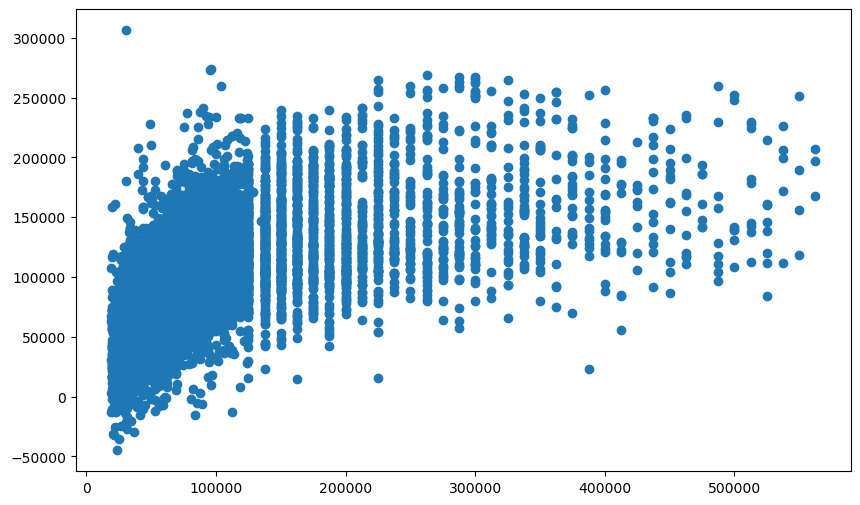

In [55]:
from  matplotlib import pyplot

pyplot.scatter(Y_test, prediction)

pyplot.show()

In [56]:
Y_test.mean()

102297.47210381144

In [57]:
from sklearn import metrics
print("MAE=", metrics.mean_absolute_error(Y_test,prediction) )
print("MSE=", metrics.mean_squared_error(Y_test,prediction))
print("RMSE=", np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE= 46547.89265814528
MSE= 4831295484.47
RMSE= 69507.52106405464


In [58]:
from sklearn.metrics import r2_score
r_squared_lm = r2_score(Y_test, prediction)

In [59]:
print(f'R-squared: {r_squared_lm * 100:.2f}%')

R-squared: 30.93%


In [60]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Assuming X is your feature matrix and Y is your target variable

# Split the data into training and testing sets
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_reg.fit(X_train_dt, Y_train_dt)

# Make predictions on the test set
Y_pred_dt = tree_reg.predict(X_test_dt)

# Evaluate the model
mse = mean_squared_error(Y_test_dt, Y_pred_dt)
mae = mean_absolute_error(Y_test_dt, Y_pred_dt)
rmse = np.sqrt(mse)
r_squared = r2_score(Y_test_dt, Y_pred_dt)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r_squared * 100:.2f}%')

Mean Squared Error: 2761945048.433647
Mean Absolute Error: 27324.167371951604
Root Mean Squared Error: 52554.210568075774
R-squared: 59.81%


In [61]:
import time
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load your data
df = pd.read_csv('house_dataset.csv')  # Make sure to use the correct path to your dataset

# Handling Outliers in 'SQUARE_FT'
Q1 = df['SQUARE_FT'].quantile(0.25)
Q3 = df['SQUARE_FT'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['SQUARE_FT'] >= lower_bound) & (df['SQUARE_FT'] <= upper_bound)]

# Make a copy of the filtered data to avoid SettingWithCopyWarning
df_filtered = df_filtered.copy()

# Transforming the Target Variable
df_filtered['TARGET(PRICE_IN_LACS)_LOG'] = np.log1p(df_filtered['TARGET(PRICE_IN_LACS)'])

# Extracting More Features from 'ADDRESS'
df_filtered['CITY'] = df_filtered['ADDRESS'].apply(lambda x: x.split(',')[-1].strip())

# Preparing the data for modeling
X = df_filtered.drop(['TARGET(PRICE_IN_LACS)', 'TARGET(PRICE_IN_LACS)_LOG', 'ADDRESS'], axis=1)
y = df_filtered['TARGET(PRICE_IN_LACS)_LOG']

# Encoding categorical features and splitting the data
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines for both numeric and categorical data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating a RandomForestRegressor model within a pipeline
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define a grid of hyperparameters to search
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest_model, 
                           param_grid=param_grid, 
                           cv=3,  # Number of folds in cross-validation
                           n_jobs=-1,  # Use all available cores
                           scoring='neg_mean_squared_error',  # MSE as the scoring metric
                           verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negate to get the positive MSE

# Output the best parameters and best score from grid search
print(f"Best parameters: {best_params}")
print(f"Best score (MSE): {best_score}")

# Making predictions on the test data using the best model
y_pred_rf = grid_search.predict(X_test)

# Transforming predictions back to the original scale
y_pred_rf = np.expm1(y_pred_rf)
y_test_original = np.expm1(y_test)

# Evaluating the model with the best estimator from GridSearchCV
mse_rf = mean_squared_error(y_test_original, y_pred_rf)
r2_rf = r2_score(y_test_original, y_pred_rf)

# Output the performance metrics for the model with the best found hyperparameters
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")

# Output the training time
#end_time = time.time()
#training_time = end_time - start_time
#print(f"Training and hyperparameter tuning took {training_time} seconds.")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 300}
Best score (MSE): 0.12921111348290834
Random Forest Mean Squared Error: 2405.059240184229
Random Forest R^2 Score: 0.765547415583359


In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load your data
df = pd.read_csv('house_dataset.csv')  # Replace with the correct path

# Handling Outliers in 'SQUARE_FT'
Q1 = df['SQUARE_FT'].quantile(0.25)
Q3 = df['SQUARE_FT'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['SQUARE_FT'] >= lower_bound) & (df['SQUARE_FT'] <= upper_bound)].copy()

# Transforming the Target Variable
df_filtered['TARGET(PRICE_IN_LACS)_LOG'] = np.log1p(df_filtered['TARGET(PRICE_IN_LACS)'])

# Preparing the data for modeling
X = df_filtered.drop(['TARGET(PRICE_IN_LACS)', 'TARGET(PRICE_IN_LACS)_LOG'], axis=1)
y = df_filtered['TARGET(PRICE_IN_LACS)_LOG']

# Encoding categorical features and splitting the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Preprocessing pipelines for both numeric and categorical data
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating a RandomForestRegressor model within a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print(f"Validation Mean Squared Error: {mse_val}")
print(f"Validation R^2 Score: {r2_val}")

# [You can then finalize the model based on these results and eventually evaluate it on the test set]
# Evaluate the model on the test set
y_pred_test = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R^2 Score: {test_r2}")

Validation Mean Squared Error: 0.10862676160509589
Validation R^2 Score: 0.8083526019511607
Test Mean Squared Error: 0.11189188406189941
Test R^2 Score: 0.7958324163357612
